<a href="https://colab.research.google.com/github/greyhound101/work_in_progress/blob/master/fellowship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow==2.1.0-rc0

     |████████████████████████████████| 402.3MB 39kB/s 
     |████████████████████████████████| 450kB 38.5MB/s 
     |████████████████████████████████| 3.8MB 48.0MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=cf6e04dc3091f1b7479f70a04cc7f289bb26a891e3e44f64223e556d2695e1fa
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflow 2.2.0rc2
    Uninstalling tensorflow-2.2.0rc2:
      Successfully uninstalled tensorflow-2.2.0rc

In [2]:
pip install keras==2.3.1

     |████████████████████████████████| 378kB 2.8MB/s 
  Found existing installation: Keras 2.2.5
    Uninstalling Keras-2.2.5:
      Successfully uninstalled Keras-2.2.5


In [3]:
pip install functions

  Created wheel for functions: filename=functions-0.7.0-cp36-none-any.whl size=3064 sha256=1660f145b4e7a225a6fab550cb46242280495a96062fabc8eb75592b1c806be8
  Stored in directory: /root/.cache/pip/wheels/f1/2e/9b/7907d32e006eaf4954ad1a976bff08867851394b26719a6d5f
Successfully built functions


In [4]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [84]:
from google.colab import drive
drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Mounted at /content/gdrive


In [85]:
pip install keras_bert

In [0]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
stop = stopwords.words('english')
df=pd.read_csv('Tweets.csv')

In [160]:

df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
import re
def func(string):
    string=' '.join(string.split(' ')[1:])
    return re.sub(r'\W+', ' ', string)

#remove special characters except space
df['text']=df['text'].apply(func)
z=df['text'].isna()
z=z[z==True].index
print(df.loc[z]['text'])
print('.....................................................')

#convert words to lower case
df['text']=df['text'].str.lower()
z=df['text'].isna()
z=z[z==True].index
print(df.loc[z]['text'])
print('.....................................................')

dk={'neutral':0,'positive':1,'negative':-1}
df['airline_sentiment']=df['airline_sentiment'].map(dk)
trn=df.loc[:10000][['text','airline_sentiment']]
tst=df.loc[10000:][['text','airline_sentiment']]


Series([], Name: text, dtype: object)
.....................................................
Series([], Name: text, dtype: object)
.....................................................


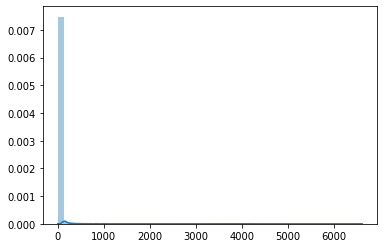

In [161]:
import gc
del([df])
gc.collect()
from keras_bert.datasets import get_pretrained, PretrainedList
model_path = get_pretrained(PretrainedList.wwm_uncased_large)

import keras as keras
import keras.backend as K
from keras.models import load_model

from keras_bert import load_trained_model_from_checkpoint, load_vocabulary
from keras_bert import Tokenizer
from keras_bert import AdamWarmup, calc_train_steps

import pandas as pd
import numpy as np
from tqdm import tqdm
import gc
from keras_bert import load_vocabulary, load_trained_model_from_checkpoint, Tokenizer, get_checkpoint_paths

#loading vocab for model

paths = get_checkpoint_paths(model_path)
token_dict = load_vocabulary(paths.vocab)
token_dict
arr=trn['text'].str.split(' ').values
trn_corpus=[]
for a in arr:
    try:
        trn_corpus.extend(a)
    except:
        continue

#seeing repeatation of each word


from collections import Counter
trn_count=Counter(trn_corpus)
import seaborn as sns
sns.distplot(list(trn_count.values()))
df=pd.DataFrame(trn_count,index=[0])
df=df.transpose()
gr_two=df[df[0]>1].index
from keras.layers import Dense


In [162]:
model = load_trained_model_from_checkpoint(paths.config, paths.checkpoint, training=True, seq_len=None)
wts=model.layers[2].get_weights()[0]

trn_dict={}
trn_corpus=set(trn_corpus)
tokens=list(token_dict.keys())
pres=[]
count=0
#if count of word>2 and word in token orginal position and new position
#if count of word>2 and word not in token -1,new position
#if count of word <2 -1,before special characters
for word in trn_corpus:
    trn_dict[word]=[]
    if word in gr_two:
        if word in tokens:
            trn_dict[word].extend([token_dict[word],count])
            pres.append(token_dict[word])
        else:
            trn_dict[word].extend([-1,count])
        count+=1
    else:
        trn_dict[word].extend([-1,len(gr_two)])
        print(word)

Streaming output truncated to the last 5000 lines.
effect
fd2tnyctrb
2brt0athau
measles
firefighters
cyoonzftdc
institutional
justwrong
braved
reevaluate
sliced
arena
ventilation
offensively
monthly
pittsburg
werenotincalianymore
constitution
transports
forevercold
freakin
rpdbpx3wnd
virtually
robert
ferrissalameh
failover
puj
2118
gills
garcia4chicago
alsoyayforsnacks
misread
1086
goodenufmother
quadruples
ukdjjijrow
fasten
pleasehelp
clarita
euros
fixes
givethoseladiesraise
transpired
863
736
keepusguessing
5imdckodfx
1558
wholly
lasttweetaboutthis
longbeachcity
aa2595
analytics
vv8cfyhkvb
operators
25m
9abc
bagsflyfree
listened
gala
canister
munich
courteroy
residing
ua1470
cheek
bur
withheld
retain
sandra
pleasent
roadmap
kurt
herba
fairly
8441639
govt
webbernaturals
upwherewebelong
tailfin
booo
indignation
bands
9shhtvioti
plowing
5lbs
ua5037
isitthegarykellyway
ashevilleair
sep
5491
transported
1818
8fkqw
overheads
employ
royal
anaphylaxis
combination
overkill
abassinet
advising


In [0]:
#embeddings of present words
pres_emb=wts[pres]
final_trn_token={}
#set defult embedding for words count > 2 and not present for count==1 embeddings = 0 
default=np.mean(pres_emb,0)
#store final embeddings

final=np.zeros((len(gr_two)+1,1024))
for word,count in trn_count.items():
    old_position,new_position=trn_dict[word]
    if count>1:
        #words present more than once
        if old_position==-1:
            #embeddings not present
            final[new_position]=default
            final_trn_token[word]=new_position
        else:
            #if embeddings present
            final[new_position]=wts[old_position]
            final_trn_token[word]=new_position
    else:
        #if count ==1
        new_position=len(gr_two)
        final[new_position]=np.zeros(len(default))
        final_trn_token[word]=new_position

In [164]:

import random
gr_two=set(gr_two)
#for all count >1
#present both in embeddings and trn will have embeddings
a=list((trn_corpus.intersection(gr_two)).intersection(tokens))
random.shuffle(a)
l1=len(a)
print('showing a pretrained embedding')
print(final[final_trn_token[a[0]]])
#present in trn but not in embeddings will have means
a=list((trn_corpus-set(tokens)).intersection(gr_two))
random.shuffle(a)
l2=len(a)
print('showing a new embedding')
print(final[final_trn_token[a[0]]])
#present in embeddings but not in trn will not be present
#for count ==1
#embeddings =0, with encode 5008
a=list(trn_corpus-gr_two)
random.shuffle(a)
print('showing a zero embedding')
print(final[final_trn_token[a[0]]])
#l1=in trn corpus with count>2 and in embeddings
#l2=in trn corpus with count >2 but not in embeddings
#1 for count==1
l1+l2+1==len(final)
lss=['[PAD]', '[UNK]', '[CLS]', '[SEP]', '[MASK]']
ln=len(final)
for count,word in enumerate(lss):
    final_trn_token[word]=ln+count
    final=np.vstack((final,wts[token_dict[word]]))


showing a pretrained embedding
[ 0.03827662 -0.02777538  0.04557963 ...  0.04501133 -0.01547834
  0.001903  ]
showing a new embedding
[-0.00286771 -0.00334311 -0.00602603 ... -0.00094865 -0.00109047
  0.00076392]
showing a zero embedding
[0. 0. 0. ... 0. 0. 0.]


In [165]:

from keras_bert import Tokenizer
tokenizer = Tokenizer(final_trn_token)
#tokenize each sentance and clip at 72
def convert_data(data_df):
    global tokenizer
    indices, targets = [], []
    for i in tqdm(range(len(data_df))):
        ids, segments = tokenizer.encode(data_df.loc[i]['text'], max_len=72)
                                         
        indices.append(ids)
        targets.append(data_df['airline_sentiment'][i])
    items = list(zip(indices, targets))
    np.random.shuffle(items)
    indices, targets = zip(*items)
    indices = np.array(indices)
    return [indices, np.zeros_like(indices)], np.array(targets)
def load_data(data_df):
    data_x, data_y = convert_data(data_df)
    return data_x, data_y
train_x, train_y = load_data(trn)
tst=tst.reset_index(drop=True)
test_x, test_y = load_data(tst)
gc.collect()


100%|██████████| 4640/4640 [00:02<00:00, 1941.65it/s]


6388

In [0]:
#take first two inputs for pretrained model and add softmax for with dimensions of embedding predicting word
from keras.models import Model
inputs = model.inputs[:2]
dense = model.layers[-3].output
outputs = keras.layers.Dense(final.shape[0], activation='softmax', kernel_initializer=keras.initializers.TruncatedNormal(stddev=0.02),
                             name = 'real_output')(dense)
model = keras.models.Model(inputs, outputs)


In [0]:
from keras.layers import Embedding
from keras.models import Model
#change the embedding layer to consist of only words of frequency>2 for trn data
emb=Embedding(final.shape[0],1024)(model.layers[0].output)
z=model.layers[4]([model.layers[3].output,emb])
lyrs=model.layers[5:]
count=0
for i in range(len(lyrs)):
    try:
      #for normal layers
        z=lyrs[i](z)
        count+=1
    except:
      #for add layers
        z=lyrs[i]([lyrs[i-2],lyrs[i-1]])
        count+=1
    lyrs[i]=z
mod=Model(inputs=model.inputs,outputs=z)
mod.layers[3].set_weights([final])


In [168]:
#set only the last layer as trainable 
for i in mod.layers:
  i.trainable=False
  print(i.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [169]:
from keras.models import Model, Sequential
from keras.layers import Dense, Input, Concatenate, Dropout,BatchNormalization
from keras.layers import Add
import keras.backend as K        
from random import randint
from keras.utils import Sequence
from math import ceil,floor
from keras.callbacks import *

class lrate(Callback):
    def __init__(self, ita):
        super(Callback, self).__init__()
        self.cut_frac=0.1
        self.T=500
        self.ratio=32
        self.ita=ita
        self.count=0
    def on_batch_end(self, epoch, logs={}):
        #after each batch increase by 1
        self.count+=1
        #rounds after which lr will decrase
        cut=self.T*self.cut_frac
        if self.count<cut:
          #while increasing divide p by cut
          p=self.count/cut
        else:
          #formula while decreasing
          p=1-((self.count-cut)/(((1/self.cut_frac)-1)*cut))
        #slanted learning rate
        lr=self.ita*(1+p*(self.ratio-1))/self.ratio
        #set value of learning rate
        K.set_value(self.model.optimizer.lr, lr)
#taining bert 
#for 0.15% randomly selected words
#0.1% of the time they will remain same
#0.1% of the time they will be replaced by random word
#rest of the time they will be replaced by mask
#task is to predict correct word 
class DAESequence(Sequence):
    def __init__(self,data,data1,batch_size,corpus,cond):
        self.batch_size=batch_size
        self.cond=cond
        self.len_data=data.shape[0]
        self.columns=data.shape[1]
        self.data=data
        self.data1=data1
        self.idx=[]
        self.corpus=corpus
    def __len__(self):
        return int(ceil(self.len_data/self.batch_size))
    def __getitem__(self,idx):
        self.idx.append(idx)
        last=min(idx+self.batch_size,self.len_data)
        size=last-idx
        output_x=self.data[idx:last]
        output_x1=self.data1[idx:last]
        length=last-idx
        data_out=np.zeros((output_x.shape[0],max(final_trn_token.values())+1))
        data=output_x
        lst=list(set(np.concatenate(data,0)))
        try:
            #remove padding
            lst.remove(0)
        except:
            pass
        ln=len(lst)-1
        chosen=[]
        idxs=[]

        #choosing 15% of vocab
        for i in range(floor(0.15*ln)):
            idx=randint(0,abs(ln))
            idxs.append(idx)
            chosen.append(lst[idx])
        rep=[]
        chosen=set(chosen)
        l1=abs(len(chosen)-1)
        data_c=data.copy()
        chosen=list(set(chosen))
        #removing chosen words from vocab 
        #creating output where for each sample all vocab words will initially be zero
        #if one of the chosen word in sentence i its position in output will be increased by 1 and
        #it will be replaced by 103 
        for val in chosen:
            lst.remove(val)
            for i in range(len(data_c)):
                if val in data_c[i]:
                  data_out[i,val]+=1
                data_c[i]=np.where(data[i] == val ,103 ,data_c[i])
        ln=len(lst)-1
        for i in range(len(data_c)):
            #select word to be replaced
            rep=chosen[randint(0,l1)]
            #remove rep from possibilities of words which are to be kept same
            chosen.remove(rep)
            l1-=1
            #select rep_w from all possibilities except chosen ones
            rep_w=lst[randint(0,ln)]
            #replace rep with rep_w
            data_c[i][data[i] == rep]=rep_w
            #set output for rep to be 1
            data_out[i,rep]=1
            #choose word from chosen which is to be kept same 
            #it is not to be rep
            sme=chosen[randint(0,l1)]
            #add rep back to chosen
            chosen.append(rep)
            #replace occurances of sme with sme
            data_c[i][data[i] == sme]=sme
            l1+=1
            #decreasing sme by 1
            data_out[i,sme]-=0
        
        if self.cond==0:
          return [data_c,output_x1],data_out
        else:
          return [data_c,output_x1]
gc.collect()

459

In [171]:

from keras.optimizers import Adam
lr=lrate(0.0001)
#training the last and embedding layer
mod.layers[-1].trainable=True
mod.layers[3].trainable=True
mod.compile(optimizer='adam',loss='categorical_crossentropy')
mod.fit_generator(DAESequence(train_x[0][:8000],train_x[1][:8000],16,final_trn_token,0),callbacks=[lr],epochs=1,validation_data=(DAESequence(train_x[0][8000:],train_x[1][8000:],8,final_trn_token,0)))

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/1
500/500 [==============================] - 196s 392ms/step - loss: 18.2779 - val_loss: 17.4693


In [172]:
path = F"/content/gdrive/My Drive/tweets_11" 
#training all layers with reduced lr
for layers in mod.layers:
  layers.trainable=True
lr=lrate(0.0001/2.6)
mod.fit_generator(DAESequence(train_x[0][:8000],train_x[1][:8000],16,final_trn_token,0),callbacks=[lr],epochs=1,validation_data=(DAESequence(train_x[0][8000:],train_x[1][8000:],8,final_trn_token,0)))

Epoch 1/1


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


500/500 [==============================] - 185s 369ms/step - loss: 17.3972 - val_loss: 16.3330


In [173]:
#training all layers with reduced lr

lr=lrate(0.0001/2.6**2)
mod.fit_generator(DAESequence(train_x[0][:8000],train_x[1][:8000],16,final_trn_token,0),callbacks=[lr],epochs=1,validation_data=(DAESequence(train_x[0][8000:],train_x[1][8000:],8,final_trn_token,0)))

Epoch 1/1


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


500/500 [==============================] - 185s 370ms/step - loss: 17.2433 - val_loss: 16.1110


In [0]:
#training all layers with reduced lr
# lr=lrate(0.0001/2.6**3)
# mod.fit_generator(DAESequence(train_x[0][:8000],train_x[1][:8000],16,final_trn_token,0),callbacks=[lr],epochs=1,validation_data=(DAESequence(train_x[0][8000:],train_x[1][8000:],8,final_trn_token,0)))

In [0]:
#add average pooling and max pooling and dense for predicting sentiment
from keras.models import Model
from keras.layers import GlobalAveragePooling1D,GlobalMaxPooling1D
inputs = mod.inputs[:2]
out1=mod.layers[-2].get_output_at(1)
dense=mod.layers[-4].get_output_at(1)
avg=GlobalAveragePooling1D()(dense)
mx=GlobalMaxPooling1D()(dense)
conc=Concatenate()([out1,avg,mx])
outputs = keras.layers.Dense(3, activation='softmax', kernel_initializer=keras.initializers.TruncatedNormal(stddev=0.02),
                             name = 'real_output_1')(conc)
mod = keras.models.Model(inputs, outputs)
out=pd.get_dummies(pd.concat([trn['airline_sentiment'],tst['airline_sentiment']],0))

In [176]:
#training pooling and last layer
for i in mod.layers:
  i.trainable=False
  print(i.trainable)
class lrate(Callback):
    def __init__(self, ita):
        super(Callback, self).__init__()
        self.cut_frac=0.1
        self.T=1000
        self.ratio=32
        self.ita=ita
        self.count=0
    def on_batch_end(self, epoch, logs={}):
        self.count+=1
        cut=self.T*self.cut_frac
        if self.count<cut:
          p=self.count/cut
        else:
          p=1-((self.count-cut)/(((1/self.cut_frac)-1)*cut))
        lr=self.ita*(1+p*(self.ratio-1))/self.ratio
        K.set_value(self.model.optimizer.lr, lr)
lr=lrate(0.0001)
mod.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
mod.layers[-4].trainable=True
mod.layers[-3].trainable=True
mod.layers[-1].trainable=True

lr=lrate(0.0001)
mod.fit([train_x[0][:8000],train_x[1][:8000]],out[:8000],batch_size=8,callbacks=[lr],validation_data=([train_x[0][8000:],train_x[1][8000:]],out[8000:10001]))

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Train on 8000 samples, validate on 2001 samples
Epoch 1/1
8000/8000 [==============================] - 110s 14ms/step - loss: 0.6909 - acc: 0.6063 - val_loss: 0.5738 - val_acc: 0.7226


In [177]:
#training all layers
for i in mod.layers:
  i.trainable=True
lr=lrate(0.0001)
mod.fit([train_x[0][:8000],train_x[1][:8000]],out[:8000],batch_size=8,callbacks=[lr],validation_data=([train_x[0][8000:],train_x[1][8000:]],out[8000:10001]))

Train on 8000 samples, validate on 2001 samples
Epoch 1/1
  16/8000 [..............................] - ETA: 1:23 - loss: 0.8000 - acc: 0.5208

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


8000/8000 [==============================] - 105s 13ms/step - loss: 0.6948 - acc: 0.6017 - val_loss: 0.5738 - val_acc: 0.7226


In [178]:
#training all layers with reduced lr
lr=lrate(0.0001/2.6)
mod.fit([train_x[0][:8000],train_x[1][:8000]],out[:8000],batch_size=8,callbacks=[lr],validation_data=([train_x[0][8000:],train_x[1][8000:]],out[8000:10001]))

Train on 8000 samples, validate on 2001 samples
Epoch 1/1
  16/8000 [..............................] - ETA: 1:24 - loss: 0.6728 - acc: 0.6042

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


8000/8000 [==============================] - 105s 13ms/step - loss: 0.6940 - acc: 0.6018 - val_loss: 0.5738 - val_acc: 0.7226


In [181]:
#training all layers with reduced lr
lr=lrate(0.0001/2.6**2)
mod.fit([train_x[0][:8000],train_x[1][:8000]],out[:8000],batch_size=8,callbacks=[lr],validation_data=([train_x[0][8000:],train_x[1][8000:]],out[8000:10001]))

Train on 8000 samples, validate on 2001 samples
Epoch 1/1
  16/8000 [..............................] - ETA: 1:32 - loss: 0.7692 - acc: 0.5833

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


8000/8000 [==============================] - 105s 13ms/step - loss: 0.6871 - acc: 0.6048 - val_loss: 0.5738 - val_acc: 0.7226


In [182]:
#training all layers with reduced lr
lr=lrate(0.0001/2.6**3)
mod.fit([train_x[0][:8000],train_x[1][:8000]],out[:8000],batch_size=8,callbacks=[lr],validation_data=([train_x[0][8000:],train_x[1][8000:]],out[8000:10001]))

Train on 8000 samples, validate on 2001 samples
Epoch 1/1
  16/8000 [..............................] - ETA: 1:23 - loss: 0.6697 - acc: 0.6250

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


8000/8000 [==============================] - 105s 13ms/step - loss: 0.6920 - acc: 0.6035 - val_loss: 0.5738 - val_acc: 0.7226


In [0]:
pre=mod.predict([test_x[0],test_x[1]])

In [0]:
a=pre.argmax(1)

In [0]:
df=pd.read_csv('Tweets.csv')
dk={'neutral':0,'positive':1,'negative':-1}
df['airline_sentiment']=df['airline_sentiment'].map(dk)
res=df.loc[10000:]['airline_sentiment']

In [186]:
from sklearn.metrics import accuracy_score
accuracy_score(res,a-1)

0.6532327586206896